# Importe de librerias y carga del dataset

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Analisis exploratorio de datos (EDA)

### Datos faltantes y recuento de valores por tipos de columnas

In [129]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [130]:
categoric_columns = df.select_dtypes(exclude='number')
numeric_columns = df.select_dtypes(include='number')
for column in categoric_columns: 
    print(df[column].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [131]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Visualizaciones de los datos en relacion a la performance en math, reading y writing


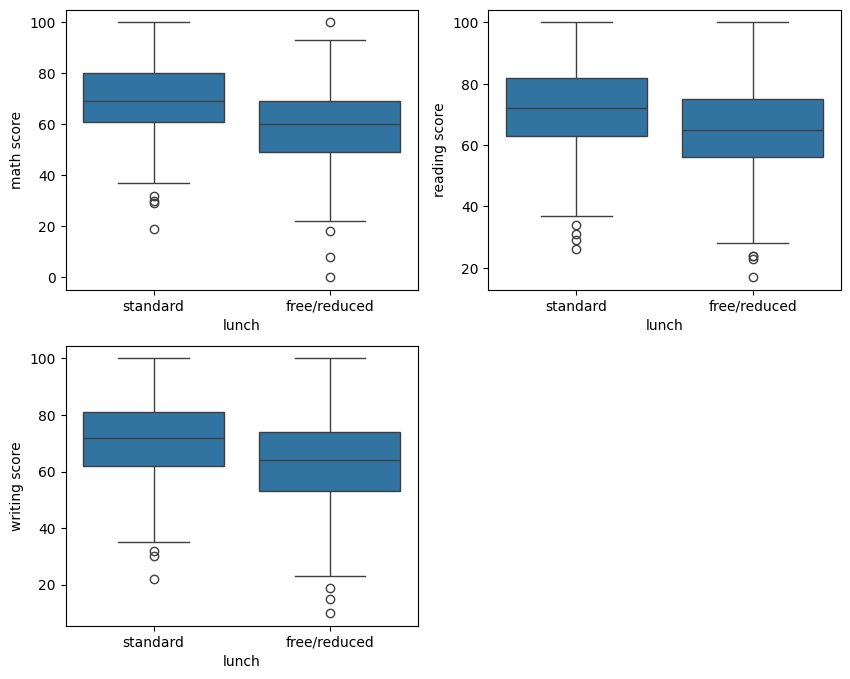

In [102]:
plt.figure(figsize=(10,8))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x='lunch',y=numeric_columns.columns[i])

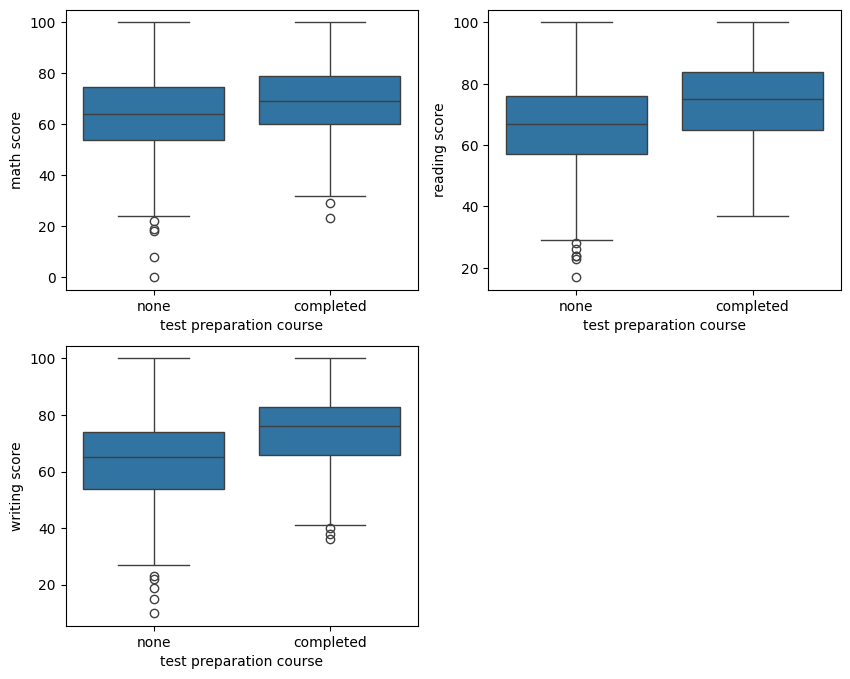

In [61]:
plt.figure(figsize=(10,8))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x='test preparation course',y=numeric_columns.columns[i])

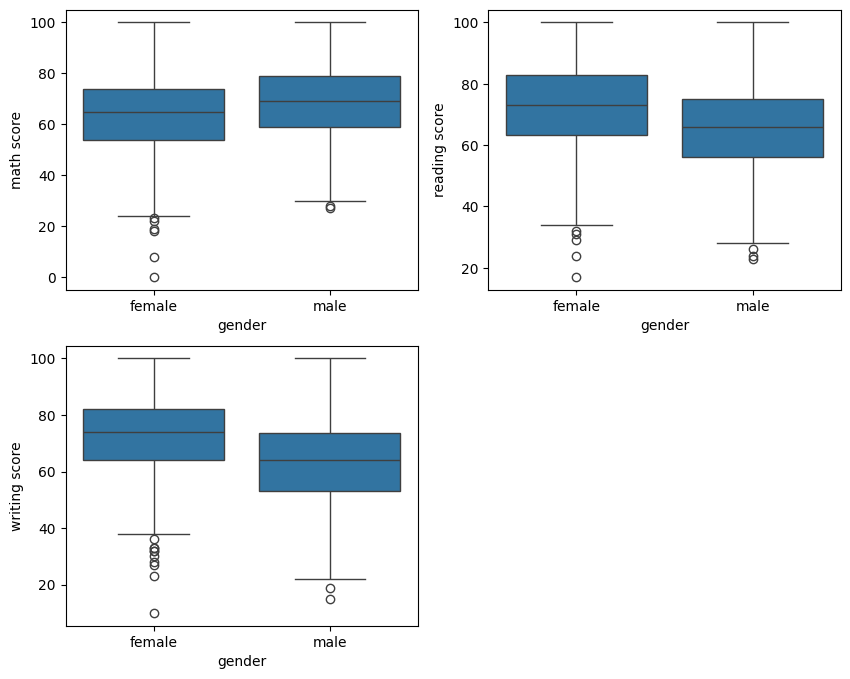

In [98]:
plt.figure(figsize=(10,8))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x='gender',y=numeric_columns.columns[i])

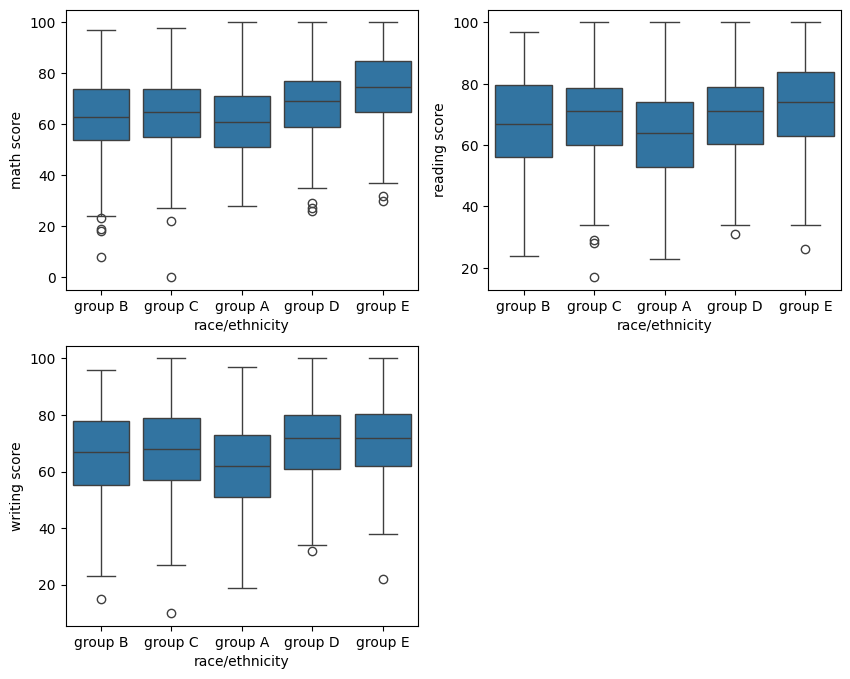

In [99]:
plt.figure(figsize=(10,8))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x='race/ethnicity',y=numeric_columns.columns[i])

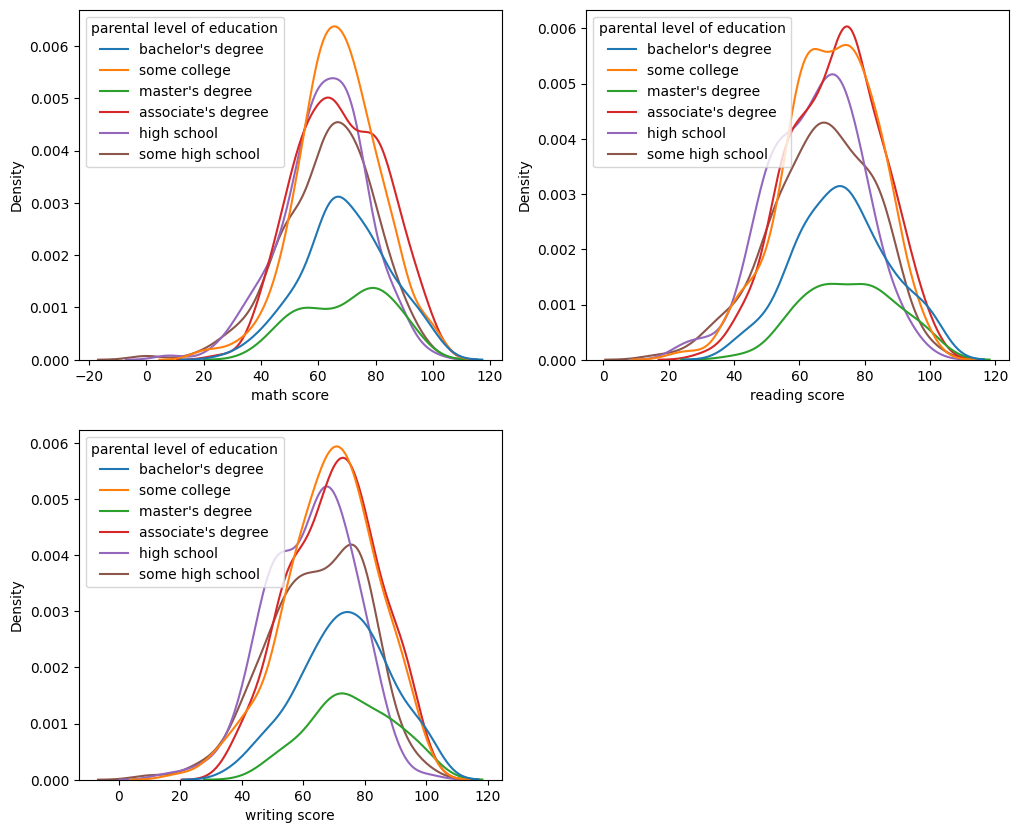

In [88]:
plt.figure(figsize=(12,10))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df,x=numeric_columns.columns[i],hue='parental level of education')
    

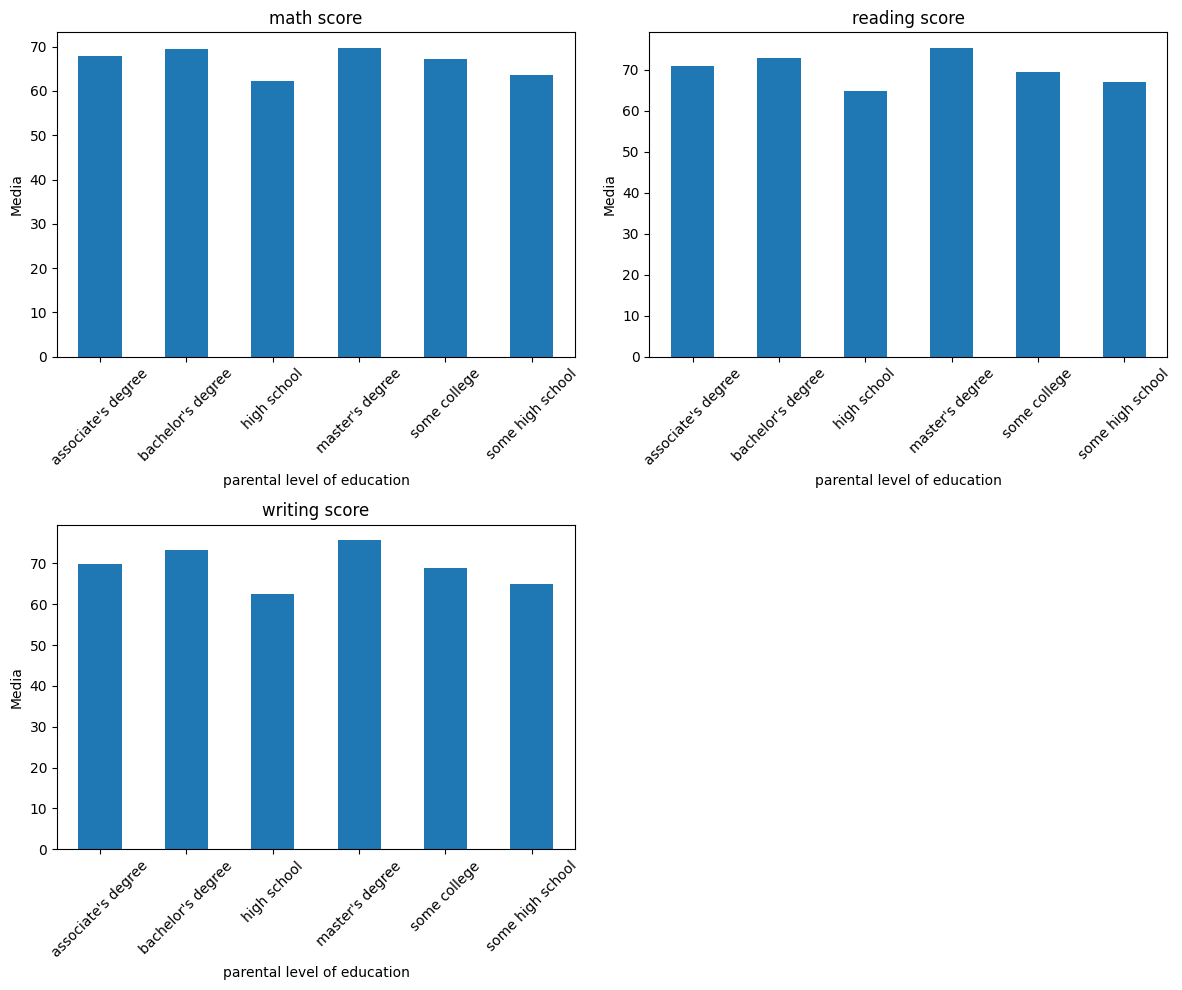

In [97]:
plt.figure(figsize=(12,10))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)       
    df.groupby('parental level of education')[numeric_columns.columns[i]].mean().plot(kind='bar')
    plt.title(numeric_columns.columns[i])
    plt.xticks(rotation=45)
    plt.ylabel('Media')
plt.tight_layout()

# Creacion del modelo 

### Preprocesamiento de variables categoricas y division train_test

In [132]:
df_sin_cat = pd.get_dummies(df,columns=categoric_columns.columns)
df_sin_cat.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


In [133]:
def division_entrenamiento_prueba(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [155]:
def train_and_evaluate(model,X_train,X_test,y_train,y_test):
    preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(),X_train.select_dtypes(include='int64').columns)])
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return pipeline,mse,r2

### Modelos de regresion

### Entrenamiento de los modelos

In [171]:
modelos = {}
for i in numeric_columns.columns:
    modelos[i]={}
    X = df_sin_cat.drop(i,axis=1)
    y = df_sin_cat[i]
    X_train, X_test, y_train, y_test = division_entrenamiento_prueba(X,y)
    rfr = RandomForestRegressor()
    lr = LinearRegression()
    gbr = GradientBoostingRegressor()
    #Random Forest
    pipeline,mse,r2 = train_and_evaluate(rfr,X_train,X_test,y_train,y_test)
    modelos[i]['rfr'] = {'modelo': pipeline, 'mse': mse, 'r2': r2}
    
    
    #Linear Regression
    pipeline,mse,r2 = train_and_evaluate(lr,X_train,X_test,y_train,y_test)
    modelos[i]['lr'] = {'modelo': pipeline, 'mse': mse, 'r2': r2}
    

    #Gradient Boost
    pipeline,mse,r2 = train_and_evaluate(gbr,X_train,X_test,y_train,y_test)
    modelos[i]['gbr'] = {'modelo': pipeline, 'mse': mse, 'r2': r2}
    


### Resultados preliminares

In [182]:
for i in modelos:
    print(f'Resultados para {i}')
    print()
    for j in modelos[i]:
        print(f'El error cuadratico medio del {j} para {i} es {modelos[i][j]["mse"].round(2)}')
        print(f'El r2 del {j} para {i} es {modelos[i][j]["r2"].round(2)}')
    print()

Resultados para math score

El error cuadratico medio del rfr para math score es 106.13
El r2 del rfr para math score es 0.56
El error cuadratico medio del lr para math score es 77.24
El r2 del lr para math score es 0.68
El error cuadratico medio del gbr para math score es 81.13
El r2 del gbr para math score es 0.67

Resultados para reading score

El error cuadratico medio del rfr para reading score es 23.91
El r2 del rfr para reading score es 0.89
El error cuadratico medio del lr para reading score es 19.86
El r2 del lr para reading score es 0.91
El error cuadratico medio del gbr para reading score es 20.01
El r2 del gbr para reading score es 0.91

Resultados para writing score

El error cuadratico medio del rfr para writing score es 27.69
El r2 del rfr para writing score es 0.89
El error cuadratico medio del lr para writing score es 23.67
El r2 del lr para writing score es 0.9
El error cuadratico medio del gbr para writing score es 25.12
El r2 del gbr para writing score es 0.9



### Optimizacion de hiperparametros

In [173]:
def train_and_evaluate_optimizado(model,parametros,X_train,X_test,y_train,y_test):
    preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(),X_train.select_dtypes(include='int64').columns)])
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model)
    ])
    grid = GridSearchCV(pipeline,parametros,cv=5,scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse = -grid.best_score_
    r2 = r2_score(y_test, y_pred)
    return grid.best_estimator_,mse,r2

In [175]:
modelos_optimizados = {}
for i in numeric_columns.columns:
    
    modelos_optimizados[i]={}
    X = df_sin_cat.drop(i,axis=1)
    y = df_sin_cat[i]
    X_train, X_test, y_train, y_test = division_entrenamiento_prueba(X,y)

    rfr = RandomForestRegressor()
    gbr = GradientBoostingRegressor()

    parametros_rfr = {'regressor__n_estimators': [10, 50, 100],
                  'regressor__max_depth': [None, 10, 20]}

    parametros_gbr = {'regressor__n_estimators': [50, 100, 200],
                  'regressor__learning_rate': [0.01, 0.1, 0.2],
                  'regressor__max_depth': [3, 5, 7]}

    #Random Forest

    pipeline,mse,r2 = train_and_evaluate_optimizado(rfr,parametros_rfr,X_train,X_test,y_train,y_test)
    modelos_optimizados[i]['rfr'] = {'modelo': pipeline, 'mse': mse, 'r2': r2}
        

    #Gradient Boost
    pipeline,mse,r2 = train_and_evaluate_optimizado(gbr,parametros_gbr,X_train,X_test,y_train,y_test)
    modelos_optimizados[i]['gbr'] = {'modelo': pipeline, 'mse': mse, 'r2': r2}
    

### Resultados de modelos optimizados

In [183]:
for i in modelos_optimizados:
    print(f'Resultados para {i}')
    print()
    for j in modelos_optimizados[i]:
        print(f'El error cuadratico medio del {j} para {i} es {modelos_optimizados[i][j]["mse"].round(2)}')
        print(f'El r2 del {j} para {i} es {modelos_optimizados[i][j]["r2"].round(2)}')
    print()

Resultados para math score

El error cuadratico medio del rfr para math score es 93.12
El r2 del rfr para math score es 0.62
El error cuadratico medio del gbr para math score es 81.38
El r2 del gbr para math score es 0.68

Resultados para reading score

El error cuadratico medio del rfr para reading score es 23.46
El r2 del rfr para reading score es 0.9
El error cuadratico medio del gbr para reading score es 19.5
El r2 del gbr para reading score es 0.91

Resultados para writing score

El error cuadratico medio del rfr para writing score es 23.19
El r2 del rfr para writing score es 0.89
El error cuadratico medio del gbr para writing score es 21.38
El r2 del gbr para writing score es 0.9



### Visualizacion de Resultados usando los mejores modelos para cada score

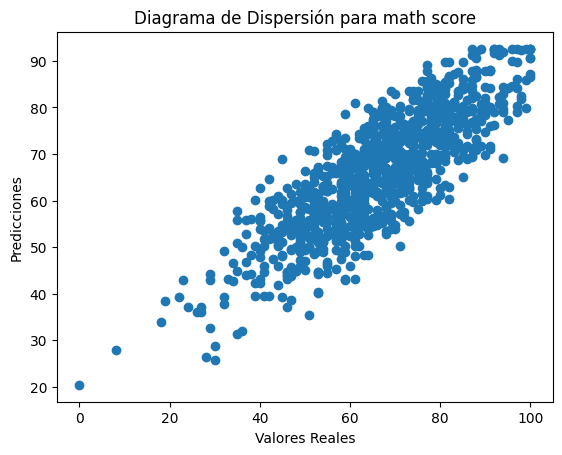

In [179]:
plt.scatter(df_sin_cat['math score'], modelos['math score']['lr']['modelo'].predict(df_sin_cat.drop('math score',axis=1)))
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de Dispersión para math score')
plt.show()

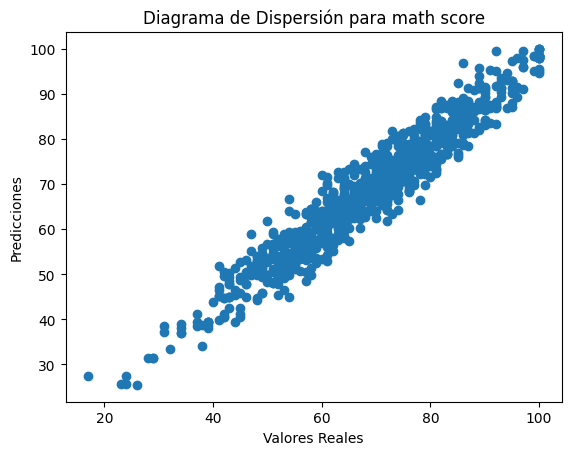

In [184]:
plt.scatter(df_sin_cat['reading score'], modelos_optimizados['reading score']['gbr']['modelo'].predict(df_sin_cat.drop('reading score',axis=1)))
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de Dispersión para math score')
plt.show()

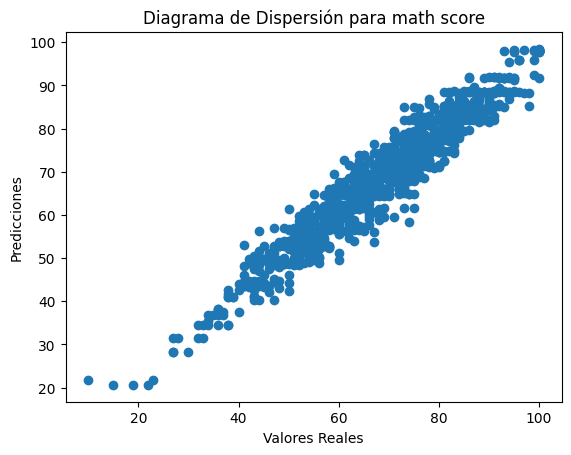

In [185]:
plt.scatter(df_sin_cat['writing score'], modelos_optimizados['writing score']['gbr']['modelo'].predict(df_sin_cat.drop('writing score',axis=1)))
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de Dispersión para math score')
plt.show()